In [1]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = False

import numpy as np
import pandas as pd
#import itertools

import networkx as nx

import string

import logging
logger = logging.getLogger()

10 Mining Social-Network Graphs
=================
1. how to identify "communities"?     
   communities: strong connections, usually overlap.
   
2. explore efficient algorithms for discovering other properities of graphs.

### 10.1 Social Networks as Graphs
#### 10.1.1 What is a Social Network?
The essential characteristics of a social network are:

1. There is a collection of entities that participate in the network.

2. There is at least one relationship between entities of the network.

   + all-or-nothing: friends of Facebook.
   
   + discrete degree: friends, family as in Google plus.
   
   + real number: the times of talking.
   
3. There is an assumption of nonrandomness or locality.      
   If A is related to both B and C, then there is a higher probability than average that B and C are related.

#### 10.1.2 Social Networks as Graphs
social graph: The entities are the nodes, and an edge connects two nodes if the nodes are realted by the relationship that characterizes the network.

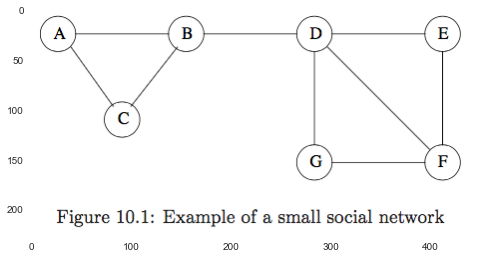

In [4]:
plt.imshow(plt.imread('./res/fig10_1.png'))

Is Fig 10.1 typical of a social network, in the sense that it exhibits locality of relationships?

Suppose X, Y and Z are nodes of Fig 10.1, with edges between X and Y and also between X and Z.

1. What would we *expect* the probability of an edge between Y and Z to be?     
   The graph has 9 edges out of the $C_7^2 = 21$ pairs of nodes. 
   
   Since we already have (X,Y) and (X,Z), the probability of an edge (Y,Z) is $(9-2)/(21-2) = 0.368$.  If the graph were large enough, that probability would be very close to the fraction of the pairs of nodes that have edges between them, i.e., $9/21 = 0.429$.
   
2. Then, we must compute the probability that $(Y,Z)$ exists in Fig 10.1, given that edges $(X,Y)$ and $(Y,Z)$ exist.      
   We count the pairs of nodes that could be $Y$ and $Z$, without worrying about which node is $Y$ and which is $Z$.
   
   If $X$ is $A$, $(B,C)$ contributes one positive example. All details are in the table following. In all, the fraction of times the third edge exists in thus $9 / 16 = 0.563 > 0.368$. 
   
| node | pos | neg |
|------|-----|-----|
| A | 1 | 0|
| C | 1 | 0|
| E | 1 | 0|
| G | 1 | 0|
| F | 2 | 1|
| B | 1 | 2|
| D | 2 | 4|
|sum| 9 | 7| 16 |


#### 10.1.3 Varieties of Social Networks
1. Telephone Networks

2. Email Networks

3. Collaboration Networks      
   + Wikipedia: articles and editors.       
   + published research papers and authors. 
   
4. Other example      
   + information networks (patents)     
   + infrastruture networks (roads)     
   + biological networks (genes)       
   + product co-purchasing networks (Groupon)   

### 10.1.4 Graphs with Several Node Types
There are other social phenomena that involve entities of different types. The natural way to represent such information is as a $K$-partite graph for some $k > 1$. In general, a $k$-partite graph consists of $k$ disjoint sets of nodes, with no edges between nodes of the same set.

Eg:    
deli.cio.cu: there are three different kinds of entites: users, tags and pages.

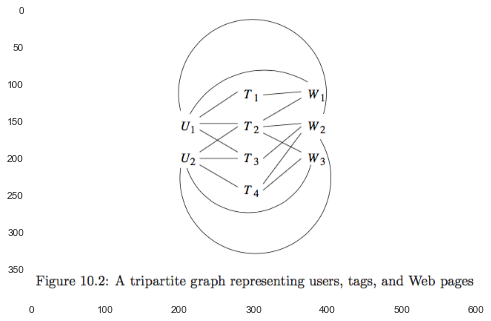

In [5]:
plt.imshow(plt.imread('./res/fig10_2.png'))

`#exercise`

### 10.2 Clustering of Social-Network Graphs
clustering of the graph as a way to identify communities.


#### 10.2.1 Distance Measures for Social-Network Graphs
distance measure:
\begin{align}
    d(x,y) = 
    \begin{cases}
         0 \text{ or } 1 \text{ or } 1 & \text{if edge} (x,y) {exists} \\
         1 \text{ or } \infty \text{ or } 1.5 & \text{otherwise}
    \end{cases}
\end{align}


#### 10.2.2 Applying Standard Clustering Methods
They are generally unsuitable for the problem of clustering social-network graphs.


#### 10.2.3  Betweenness: define
*betweenness* of an edge $(a,b)$:    
the number of pairs of nodes $x$ and $y$ such that $(a,b)$ lies on the shortest path between $x$ and $y$. And it's credicted with the fraction of all shortest paths between $x$ and $y$ if existed.

A high score indicates that $(a,b)$ runs between two different communities, namely, $a$ and $b$ do no belong to the same community.


#### 10.2.4 The Girvan-Newman Algorithm: calculate betweenness
The algorithm is aimed to calculate the number of shortest paths going through each eage.

1) Starting at a node $X$, perform a breadth-first search (BFS) of the graph to label levels of each node.       
   + DAG edges: edges between levels.
   
   + If there is a DAG edge $(Y,Z)$, where $Y$ is at the level about $Z$, then we shall call $Y$ a *parent* of $Z$ and $Z$ a *child* of $Y$.
   
2) to label each node by the number of shortest paths that reach it from the root.      
   + Start by labeling the root 1.       
   + Then, from the top down, label each node $Y$ by the sum of the labes of its parents.

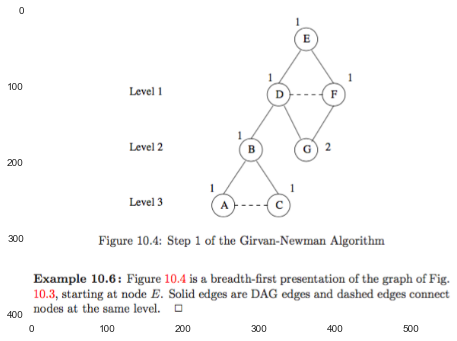

In [4]:
plt.imshow(plt.imread('./res/fig10_4.png'))

3) to calculate for each edge $e$ the sum over all nodes $Y$ of the fraction of shortest paths from the root $X$ to $Y$ that go through $e$.        
   + from the bottom up.
   
   1. Each leaf in the DAG gets a credit of 1.
   
   2. Each node that is not a leaf gets a credit = 1 + the sum of the credits of the DAG edges from that node to its child nodes.
   
   3. credit for $(Y_i, Z)$ is: 
   $$\text{credit}(Y_i, Z) = \text{credit}(Z) \frac{p_i}{\sum_{j=1}^k p_i}$$
   where $Y_1, Y_2, \dotsc, Y_k$ are the parents of $Z$, and $p_i$ is the number of the shorest paths from the root to $Y_i$, namely, the labels in Step 2).

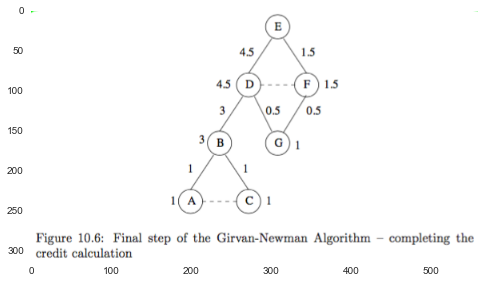

In [3]:
plt.imshow(plt.imread('./res/fig10_6.png'))

4) After performing the credit calculation with *each node* as the root, 
   1. we sum the credits for each edge. 
   
   2. And then divive the credit for each edge by 2, as each shortest path will have been discovered twice.
   
   3. Then we get the the true betweenness.

#### 10.2.5 Using Betweenness to Find Communities
It's a process of edge removal:

1. Start with the graph and all its edges;

2. then remove edges with the highest betweenness, until the graph has broken into a suitable number of connected components.

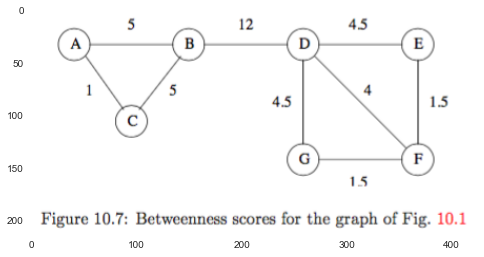

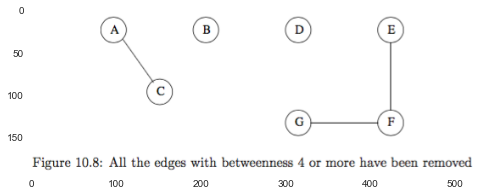

In [5]:
plt.imshow(plt.imread('./res/fig10_7.png'))
plt.figure()
plt.imshow(plt.imread('./res/fig10_8.png'))

Speeding up the Betweenness Calculation:      
If the large is large, we can pick a subset of the nodes at random and use these as the root of breadth-first searches, we can get an approximation to the betweenness of each edge that will serve in most applications.

**cons**:      
It is not possible to place an individual in two different communities, and everyone is assigned to a community.

In [6]:
# Exercises for Section 10.2

### 10.3 Direct Discovery of Communities
#### 10.3.1 Finding Cliques
NP-complete: finding a large *clique* (a sef of nodes with edges between any two of them).

#### 10.3.2 Complete Bipartite Graphs
A *complete bipartite graph* $K_{s,t}$ consists of $s$ nodes on one side and $t$ nodes on the other side, with all $st$ possible edges between the nodes of one side and the other present.

**Idea**:    

1. While it is not possible to guarantee that a graph with many edges necessarily has a large clique, it is possible to guarantee that a bipartite graph with many edges has a large complete bipartite subgraph.

2. We can regard a complete bipartite subgraph as the nucleus of a community, and add to it nodes with many edges to existing members of the community.

   + If its nodes is consisted of two or more types, construct bipartite graphs directly.
   
   + If all nodes have the same type, divide the node into two equal groups at random.

#### 10.3.3 Finding Complete Bipartite Subgraphs
It's possible to view the problem of finding instance of $K_{s,t}$ within $G$ as one of finding frequent itemsets.

1. "items" - left side.    

2. "baskets" - right side.      
    The members of the basket for node $v$ are the nodes of the left side to which $v$ is connected.

3. Let the support threshold be $s$, the number of nodes that the instance of $K_{s,t}$ has on the right side.

the problem of find $K_{s,t}$ $\to$ finding frequent itemsets $F$ of size $t$.

#### 10.3.4 Why Complete Bipartite Graphs Must Exist
Assume:

1. the graph $G$ has $n$ nodes on the left and another $n$ nodes on the right.

2. let $d$ be the average degree of all nodes.

3. the degree of the $i$th node on the right is $d_i$.

Proof:

1. The total contribution of the $n$ nodes on the right is $\sum_i \binom{d_i}{t} \geq n \binom{d}{t}$ .

2. The number of itemsets of size $t$ is $\binom{n}{t}$.

3. Thus, the average count of an itemset of size $t$ is $n \binom{d}{t} / \binom{n}{t}$ ???

\begin{align}
    n \binom{d}{t} / \binom{n}{t} &= n \frac{d!}{(d-t)! t!} \frac{t! (n-t)!}{n!} \\
        &= n \frac{d (d-1) \dotso (d-t+1)}{n (n-1) \dotso (n-t+1)} \\
        &\approx n \frac{d^t}{n^t} \quad \text{when } n >> d >> t
\end{align}

That is, if there is a community with $n$ nodes on each side, the average degree of the nodes is $d$, and $n(d/n)^t \geq s$, then this community is guaranteed to have a complete bipartite subgraph $K_{s,t}$.

In [2]:
# Exercises for Section 10.3

### 10.4 Partitioning of Graphs
tools from matrix theory $\to$ minimizing the "cut" size.

#### 10.4.1 What Makes a Good Partition?
1. divide the nodes into two sets so that the *cut* (sets of edges between two groups) is minimized.

2. two sets are approximately equal in size.

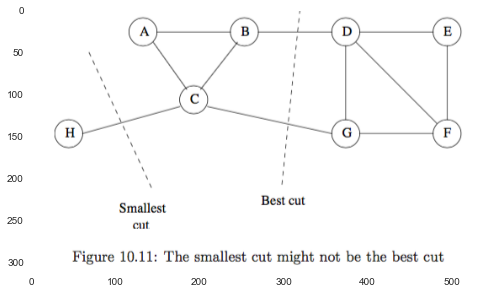

In [2]:
plt.imshow(plt.imread('./res/fig10_11.png'))

#### 10.4.2 Normalized Cuts
A proper definition of a "good" cut must belance the size of the cut itself against the difference in the sizes of the sets that the cut creates.

The *normalized cut* value for $S$ and $T$ is
\begin{equation}
    \frac{\operatorname{Cut}(S,T)}{\operatorname{Vol}(S)} + \frac{\operatorname{Cut}(S,T)}{\operatorname{Vol}(T)}
\end{equation}
where $\operatorname{Vol}(S)$ is the number of edges with at least one end in $S$, and $\operatorname{Cut}(S,T)$ is the number of edges connected between $S$ and $T$.

#### 10.4.3 Some Matrices That Describe Graphs
1. adjacent matrix:
   \begin{equation}
       A_{i,j} = \begin{cases}
                     1, & \text{if node $i$ and $j$ is connected} \\
                     0, & \text{otherwise}
                 \end{cases}
   \end{equation}
   
2. degree matrix:
   $D_{i,i}$ is the degree of the $i$th node.
   
3. Laplacian matrix:
   $L = D - A$
   Notice that each row and column sums to zero.

#### 10.4.4 Eigenvalues of the Laplacian Matrix
The smallest eignevalues and their eigenvectors reveal the information we desire.

1. The smallest eignevalues for every Laplacian matrix is 0, and its corresponding eigenvectors is $\mathbf{1}$ ones matrix.

2. the second-smallest eigenvalues of $L$ is the minimum of $x^T L x$, and the minimum is taken under the constraints:
   + $\displaystyle \sum_{i=1}^n x_i^2 = 1$
   + $x$ is orthogonal to the eigenvector associated with the smallest eigenvalue.
     $$x^T \mathbf{1} = \displaystyle \sum_{i=1}^n x_i = 0$$
     
In all:
$x^T L x = \sum_{i,j} (x_i - x_j)^2$
     
As a consequence, $x$ must have some positive and some negative components $\to$ two sets/groups.

#### 10.4.5 Alternative Partitioning Methods
1. We could set the threshold at some point other than zero.

2. We may also want to a partition into more than two components:
   + split repeatedly as far as desired.
   + use several of the eigenvectors to partition the graph.
   
Attention:     
while each eigenvector tries to produce a minimum-sized cut, the fact that successive eigenvectors have to satisfy more and more constraints generally causes the cuts they describe to be progressively worse.

In [4]:
# Exercises for Section 10.4
## Ex 10.4.1 
### (a)

edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'C'), 
    ('B', 'H'), ('C', 'D'), ('H', 'I'),
    ('H', 'G'), ('D', 'E'), ('D', 'F'),
    ('I', 'G'), ('G', 'E'), ('E', 'F')
]

G = nx.Graph()
G.add_edges_from(edges)

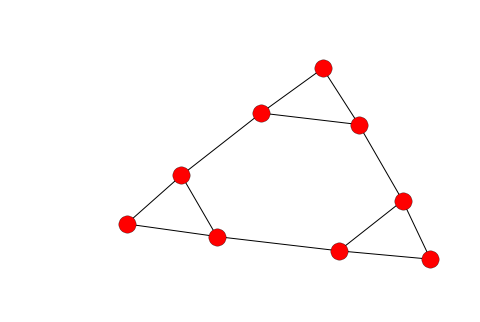

In [13]:
nx.draw(G)

In [16]:
A = nx.adjacency_matrix(G).todense()
A

matrix([[0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

In [35]:
D = np.diag(np.ravel(A.sum(axis=1)))
D

array([[2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3]], dtype=int64)

In [36]:
L = D - A
L

matrix([[ 2,  0,  0,  0,  0,  0,  0, -1, -1],
        [ 0,  2, -1,  0,  0, -1,  0,  0,  0],
        [ 0, -1,  3, -1,  0, -1,  0,  0,  0],
        [ 0,  0, -1,  3, -1,  0, -1,  0,  0],
        [ 0,  0,  0, -1,  2,  0, -1,  0,  0],
        [ 0, -1, -1,  0,  0,  3,  0,  0, -1],
        [ 0,  0,  0, -1, -1,  0,  3, -1,  0],
        [-1,  0,  0,  0,  0,  0, -1,  3, -1],
        [-1,  0,  0,  0,  0, -1,  0, -1,  3]], dtype=int64)

In [89]:
### Ex 10.4.2 
w, v = np.linalg.eig(L)

In [98]:
eig_min = np.argmin(w)
w = np.delete(w, eig_min)
v =np.delete(v, eig_min, axis=0)

eig_2nd_min = np.argmin(w)
eigv_2nd_min = np.ravel(v[eig_2nd_min])

In [105]:
setA = set([n for v, n in zip(eigv_2nd_min, G.nodes()) if v >= 0])
setB = set(G.nodes()) - setA
print(setA, setB)

{'B', 'F', 'D', 'C', 'A', 'E'} {'I', 'H', 'G'}


### 10.5 Finding Overlapping Communities
Communities are in practice rarely disjoint.

Assume:     
the probability that two individuals are connected by an edge increases as they become members of more communities in common.

#### 10.5.1 The Nature of Communities
We expect edges to be dense with any community, but we expect edges to be even denser in the intersection of two communities, three communities, and so on.

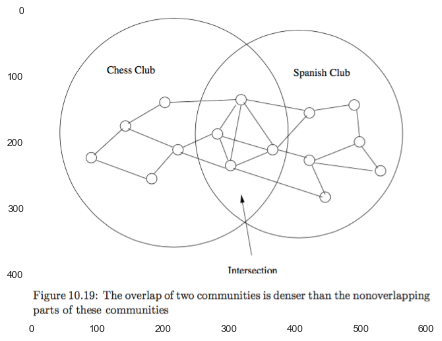

In [2]:
plt.imshow(plt.imread('./res/fig10_19.png'))

#### 10.5.2 Maximum-Likelihood Estimation
We assume that the value of the parameters that gives the largest value of the likelihood is the correct model for the observed artifact.
$$\operatorname{argmax}_{\theta} P[f(\theta)]) $$

prior probabilities:
$$\operatorname{argmax}_{\theta} P[f(\theta)]) = \operatorname{argmax}_{\theta} P[f(\theta) | \theta] \, P[\theta] $$

#### 10.5.3 The Affiliation-Graph Model
affiliation-graph model: generate social graphs from communities.

community-affiliation graphs:

+ Given: $C$ communities, $N$ nodes(individuals).

+ Question: $n_i \in C_k$ ?

+ Model:
  - Parameter: the memberships in the communities, $C_k = {n_i}$. 
  - Parameter: $P_{ck}$ is the probability that two members of community $C_k$ are connected by an edge, $P_{ck} = P[(u,v) \in E \, | \, u \in C_k, v \in C_k]$.
  
  
we compute the likelihood that a given graph with the proper number of nodes is generated by this mechanism.

##### membership: Y/N
1. Parameter: membership
  define membership: $n_i \in C_k$.     
  0 / 1, Yes / No, decrete variable $\to$ brute search

2. Parameter: $P_{ck}$ 
\begin{align}
    &P_{u,v} = 1 - \displaystyle \prod_{C_k in M} (1 - P_{ck})  \quad \text{where } M = {C_i: u \in C_i, v \in C_i}\\
    &P[f(P_{ck}, C_k, E)] = \displaystyle \prod_{(u,v) \in E} P_{u,v} \, \prod_{(u,v) \notin E} (1 - P_{u,v}) 
\end{align}

3. Goal:
   find $\operatorname{argmax}_{C_k} P[f(P_{ck}, C_k, E)]$. 
   
##### membership: "strength"
avoiding the use of discrete membership changes. This improvement allows us to use standard methods.

"strenght of membership":     
the stronger the membership of two individuals in the same community, the more likely it is that this community will cause them to have an edge between them.

In the improved model,

1. Parameter: membership
   define membership: strength, $F_{xC} \in \mathbb{R}_{\ge 0}$
   
2. Parameter: $P_{ck}$
   $$P_C(u,v) = 1 - e^{- F_{u,C} F_{v,C}}$$

In [3]:
# exercise

### 10.6 Simrank
The purpose of simrank is to measure the similarity between nodes of the same type, and it does so by seeing where random walkers on the graph wind up when starting at a particular node $\to$ limited in the size of graphs.

#### 10.6.1 Random Walkers on a Social Graph
Random walkers:

A walker at a node $N$ of an undirected graph will move with equal probability to any of the *neighbors* of $N$.

#### 10.6.2 Random Walks with Restart
Let $M$ be the *transition matrix* of the graph $G$: the entry in row $i$ and column $j$ of $M$ is $1/k$ if node $j$ of $G$ has degree $k$, and one of the adjacent nodes is $i$.

$\beta$ is the probability that the walker continues at random, so $1 - \beta$ is the probability the walker will teleport to the initial node $N$. 

$v'$ is the probability the walker is at each of the nodes at the next round:
$$v' = \beta M v + (1 - \beta) e_N$$

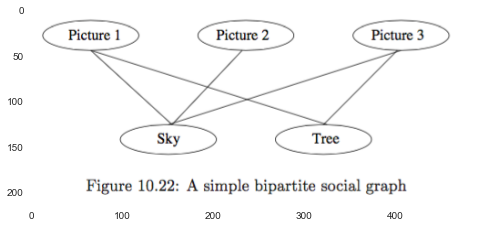

In [2]:
plt.imshow(plt.imread('./res/fig10_22.png'))

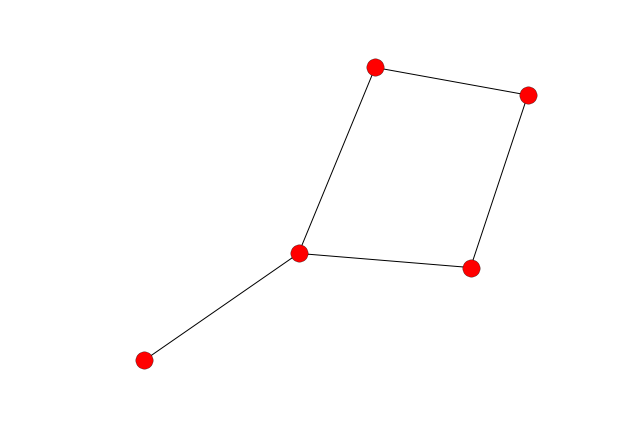

In [2]:
edges = [
    ('Picture 1', 'Sky'),
    ('Picture 1', 'Tree'),
    ('Picture 2', 'Sky'),
    ('Picture 3', 'Sky'),
    ('Picture 3', 'Tree')
]

G=nx.Graph()
G.add_edges_from(edges)
nx.draw(G)

In [3]:
nodelist = ['Picture 1', 'Picture 2', 'Picture 3', 'Sky', 'Tree']
adj = nx.adjacency_matrix(G, nodelist=nodelist).todense()

In [4]:
adj = pd.DataFrame(adj, index=nodelist, columns=nodelist)
adj

,Picture 1,Picture 2,Picture 3,Sky,Tree
Picture 1,0,0,0,1,1
Picture 2,0,0,0,1,0
Picture 3,0,0,0,1,1
Sky,1,1,1,0,0
Tree,1,0,1,0,0


In [5]:
M = adj.apply(lambda x: x / sum(x), axis=0)
M

,Picture 1,Picture 2,Picture 3,Sky,Tree
Picture 1,0.0,0,0.0,0.333333,0.5
Picture 2,0.0,0,0.0,0.333333,0.0
Picture 3,0.0,0,0.0,0.333333,0.5
Sky,0.5,1,0.5,0.000000,0.0
Tree,0.5,0,0.5,0.000000,0.0


In [6]:
beta = 0.8
e_0 = np.identity(M.shape[0])[0]
e_0 = pd.DataFrame({'e_0': e_0}, index=nodelist)
e_0

,e_0
Picture 1,1
Picture 2,0
Picture 3,0
Sky,0
Tree,0


In [7]:
def random_walk(v: pd.DataFrame, beta: float, M: pd.DataFrame, e_n: pd.DataFrame) -> pd.DataFrame:
    return beta * (M.dot(v)) + (1 - beta) * e_n

In [8]:
v = [e_0]
iter_time = 50

v_ = v[0]
for k in range(iter_time):
    v_ = random_walk(v_, beta, M, e_0)
    v.append(v_) 

index = list(range(iter_time+1))
pd.concat(v, axis=1).T.reset_index(drop=True).T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Picture 1,1,0.2,0.466667,0.253333,0.418311,0.286329,0.391308,0.307325,0.374446,0.320749,...,0.344591,0.344625,0.344598,0.344620,0.344603,0.344616,0.344605,0.344614,0.344607,0.344613
Picture 2,0,0.0,0.106667,0.021333,0.100978,0.037262,0.089448,0.047699,0.081228,0.054405,...,0.066326,0.066343,0.066329,0.066340,0.066331,0.066338,0.066333,0.066337,0.066333,0.066336
Picture 3,0,0.0,0.266667,0.053333,0.218311,0.086329,0.191308,0.107325,0.174446,0.120749,...,0.144591,0.144625,0.144598,0.144620,0.144603,0.144616,0.144605,0.144614,0.144607,0.144613
Sky,0,0.4,0.080000,0.378667,0.139733,0.335431,0.178873,0.304605,0.204019,0.284540,...,0.248785,0.248734,0.248774,0.248742,0.248768,0.248747,0.248764,0.248750,0.248761,0.248752
Tree,0,0.4,0.080000,0.293333,0.122667,0.254649,0.149063,0.233046,0.165860,0.219557,...,0.195707,0.195673,0.195700,0.195679,0.195696,0.195682,0.195693,0.195684,0.195691,0.195686


1. If we wanted to know what node were most similar to another node, we would have to start the analsis over for that node.

2. notice that convergence takes time, since there is an initial oscillation.

In [66]:
# Exercise

### 10.7 Counting Triangles
#### 10.7.1 Why Count Triangles?
1. to measure the extent to which a graph looks like a social network.

   If we start with $n$ nodes and add $m$ edges to a graph at random:
   + sets of three nodes: $\binom{n}{3}$.
   + The probability of an edge between any two given nodes being added is $m / \binom{n}{2} \approx 2 m / n^2$.
   + The probability that any set of three nodes has edges between each pair (independently chosen) is $(2m / n^2)^3 = 8 m^3 / n^6$.
   + expected number of triangles of random graph is $(8 m^3 / n^6) (n^3 / 6) = \frac{4}{3} (m / n)^3$.
   
   We expect the number of triangles to be much greater than the value for a random graph.
   
2. It has been demonstrated that the age of a community is related to the density of triangles.

#### 10.7.2 An Algorithm for Finding Triangles
Suppose we have a graph of $n$ nodes and $m \geq n$ edges.

nouns:
+ heavy hitter: the node whose degree is at least $\sqrt{m}$.
  note, the number of heavy-hitter nodes is nore more than $2\sqrt{m}$, since otherwise the sum of degree of nodes would be more than $2m$.
  
+ heavy-hitter triangle: the triangle all three of whose nodes are heavy hitter.

Assuming the graph is represented by its edges, we preprocess the graph as follows:

1. Compute the degree of each node. $O(m)$

2. Create an index on edges, with the pair of nodes at its ends as the key. constructed in $O(m)$. Query the existence of an edge $O(1)$.

3. Create another index of edges, this one with key equal to a single node. to retrieve the nodes adjacent to given node. $O(\sqrt{m})$


order the nodes: `nodes.sort_values(by=['degree', 'id'])`


##### Finding triangles:
1. Heavy-Hitter Triangles:
   Find in all heavy-hitter nodes which is only $O(\sqrt{m})$.
   time: $O(\sqrt{m}^3) = O(m^{3/2})$
   
2. Other Triangles:
   Consider each edge $(v_1, v_2)$:
   + if both $v_1$ and $v_2$ are heavy hitters, ignore the dege. (use $v_3$ since the computation is less).
   
   + if $v_1 < v_2$, query whether $(v_1.\text{adjacent nodes}), v_2)$ exits. $O(\sqrt{m} * m) = O(m^{3/2})$.
   
The total time of the algorithm is $O(m^{3/2})$.

#### 10.7.3 Optimality of the Triangle-Finding Algorithm
It turns out the algorithm described above is, to within an order of magnitude the best possible.

For a complete graph on $n$ nodes, it has $m = \binom{n}{2}$ edges and the number of triangles is $\binom{n}{3}$. Since we cannot enumerate triangles in less time than the number of those triangles $O(n^3) = O((\sqrt{m})^3) = O(m^{3/2})$.

For sparse graphs, we can add to the complete graph a chain of nodes with any length up to $n^2$ to convert.

#### 10.7.4 Finding Triangles Using MapReduce
multiway join technique:
$E(X, Y) \bowtie E(X, Z) \bowtie E(Y, Z)$

if we hash nodes to $b$ buckets, then there will be $b^3$ reducers, since $(h(u), h(v), z)$, $(h(u), y, h(v))$ and $(x, h(u), h(v)$ are mapped.     
$\to$ The total communication required is thus $3b$ key-value pairs for each of the $m$ tuples of the edge relation $E$, namely $O(mb)$ if we use $b^3$ Reduce tasks.     
$\to$ each Reduce task receives $O(mb) / b^3 = O(m / b^2)$ edges.     
$\to$ If we use the algorithm of Section 10.7.2, the computation cost of each Reduce is $O((m / b^2)^{3/2})$. Thus, the total computation cost of $b^3$ Reduce is $O((m / b^2)^{3/2} * b^3) = O(m^{3/2})$.

#### 10.7.5 Using Fewer Reduce Tasks
By a judicious ordering of the nodes, we can lower the number of reduce tasks by approximately a factor of 6.

Order by "name", $(h(i), i)$. The Reduce task corresponding to list of bucket $(i, j, k)$ will be needed only if $i \leq j \leq k$.

#### 10.7.6 Exercises for Section 10.7

### 10.8 Neighborhood Properties of Graphs
#### 10.8.1 Directed Graphs and Neighborhoods
all undirected graphs can be represented by directed graphs.

**path**: a sequence of nodes in a directed graph. Its *length* is the number of arcs, instead of nodes, along the path.

The *neighborhood of radius* $d$ for $v$ is: $\{u : \operatorname{len}(u, v) \leq d\}$, denote this neighborhood by $N(v, d)$.

The *neighborhood profile* of a node $v$ is the sequence of sizes of its neighborhoods $|N(v, 1)|, |N(v, 2)|, \dotso$.

#### 10.8.2 The Diameter of a Graph
The *diameter* $d$ of a directed graph: $\max (\operatorname{len}(u, v)): u \in G, v \in G$.

for each node $v$, we can find the smallest $d$ such that $|N(v, d)| = |N(v, d+1)|$, and call it $d(v)$. $\to$ the $d$ of $G$ is: $\max_{v} d(v)$.

A graph is *strongly connected* if there is a paht from any node to any other node. If $G$ is strongly connected, the $d = \max_{v} d(v)$.

"six degrees of separation": the diameter of social graph is six. Unfortunately, not all important graphs exhibit such tight connections.

#### 10.8.3 Transitive Closure and Reachability
The *transitive closure* of a graph is: $\{(u, v) : \operatorname{len of Path}(u, v) \geq 0 \}$. denoted $\operatorname{Path}(u, v)$.

*reachability*: we say node $u$ reaches node $v$ if $\operatorname{Path}(u, v)$.

$\operatorname{Path}(u, v)$ is true if and only if $v$ is in $N(u, \infty) = \cup_{i \geq 0} N(u, i)$.

The two problems - transtive closure and reachability - are related, but there are many examples of graphs where reachability is feasible and transitive closure is not.

#### 10.8.4 Transitive Closure Via MapReduce
transitive closure is actually more readily parallelizable than is reachability.

##### calculate reachability
$\operatorname{Arc}(X, Y) = \{(x, y) \text{ where } x \to y\}$.

```
SELECT DISTINCT Arc.Y
FROM Reach, Arc
WHERE Arc.X = Reach.X
```

how many rounds this process requires depends on how far from $v$ is the furthest node that $v$ can reach.


##### calculate transitive closure
recursive-doubling method

```
SELECT DISTINCT p1.X, p2.Y
FROM Path p1, Path p2
WHERE p1.Y = p2.X
```

#### 10.8.5 Smart Transitive Closure
The above recursive-doubling method does a lot of redundant work, since there may exist many paths between two nodes.

_smart_ transitive closure:     
Every path of length greater than 1 can be broken into a _head_ whose length is a power of 2, followed by a _tail_ whose length is no greater than the length of the head.

$Q(X, Y)$ holds all pairs of nodes $(x, y)$ such that the shortest path from $x$ to $y$ is of length exactly $2^i$ after the $i$th round.

Intitally, set both $Q$ and _Path_ to be copies of the relation _Arc_.

On the $(i + 1)$st round, we do the following:

1. Compute a new value for $Q$ by joining it with itself:    
   ```
   SELECT DISTINCT q1.X, q2.Y
   FROM Q q1, Q q2
   WHERE q1.Y = q2.X
   ```
   
2. Subtract _Path_ from the relation _Q_ computed in step 1.

3. Join _Path_ with the nw value of _Q_ computed in 2:    
   ```
   SELECT DISTINCT Q.X, Path.Y
   FROM Q, Path
   WHERE Q.Y = Path.X
   ```
   
4. Set the new value of _Path_ to be the union of the relation computed in step 3, the new value of _Q_ computed in step 1, and the old value of _Path_.

#### 10.8.6 Transitive Closure by Graph Reduction
collapse an SCC (Stronly connected components) to a single node when computing the transitive closure.

to find most of the SCC's in a graph by some random node selections followed by two breadth-first searches.

Let $G$ be the graph to be reduced, and let $G'$ be $G$ with all the arcs reversed.

1. Pick a node $v$ from $G$ at random.

2. Find $N_G(v, \infty)$, the set of nodes reachable from $v$ in $G$.

3. Find $N_{G'} (v, \infty)$, the set of nodes that $v$ reaches in the graph $G'$ that has the arcs of $G$ reversed.

4. Construct the SCC S containing $v$, which is $N_G(v, \infty) \cap N_{G'}(v, \infty)$.

5. Replace SCC S by a single node $s$ in $G$.

#### 10.8.7 Approximating the Sizes of Neighborhoods
approximation:

1. apply hash function $h$ to nodes $\{v\}$, find the longest "tail length" $R$.

2. estimate the size of the set is $2^R$.

In [ ]:
# Exercise 10.8.8